# Lab_01 데이터 전처리

### Context
#### Scaling
+ Min-Max Normalize
+ Standard Normalize(z-score)

#### Sampling
+ Random Up-Down Sampling
+ SMOTE

#### Dimensionality Reduction
+ PCA

#### Categorical Variable to Numeric Variable
+ Label Encoding
+ One-hot Encoding

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

abalone_path = join('data', 'abalone.txt')
column_path = join('data', 'abalone_attributes.txt')

abalone_columns = list()
for l in open(column_path):
    abalone_columns.append(l.strip())

먼저 머신러닝의 대표적인 데이터 셋 중 하나인 전복 데이터를 불러오겠습니다.<br>
전복 데이터셋은 수컷, 암컷, 유아기 3개의 범주로 이루어진 범주형 변수와 길이, 직경, 높이, 무게 등 여러 수치형 변수로 이루어져 있습니다. <br>
데이터를 불러온 후 입력으로 사용할 변수들과 레이블로 사용할 성별 변수로 나누겠습니다.

In [2]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
label = data['Sex']

df.head() 함수로 맨앞 5개의 데이터를 확인할 수 있습니다.

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

Pandas DataFrame에서 특정 컬럼을 제거하는 방법은 df.drop(컬럼리스트) 또는 del df[컬럼이름] 을 사용해 제거할 수 있습니다.

In [5]:
del data['Sex'] # delet는 파이썬 기본 문법

성별 컬럼이 제거되었습니다.

In [6]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


df.describe() 함수는 각 변수별 평균, 표준편차, 최대, 최소, 사분위수 등의 기초 통계량을 확인할 수 있습니다.

In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


df.info() 함수로 각 변수들의 자료형을 확인할 수 있습니다.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


# Scaling
## 스케일링을 왜 해야할까요?
변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target 에 미치는 영향력이 제대로 표현되지 않을 수 있습니다.<br>
Sklearn의 대표적인 스케일링 함수로는 특정 변수의 최대, 최소 값으로 조절하는 Min-Max 스케일링과 z-정규화를 이용한 Standard 스케일링이 있습니다.
### 1. Min-Max Scaling
- Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다. <br> 
수식을 직관적으로 이해해보면, X에 존재하는 어떤 가장 작은 값 x <sub>m</sub>에 대해서 x <sub>m</sub>는 Min(X)의 값과 같습니다. <br>
따라서 스케일링 후 x<sub>m</sub>은 0이되고, X에 존재하는 어떤 가장 큰 값x <sub>M</sub>은 분모의 식과 같아지므로 1이됩니다.

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$ 

Sklearn에서 Min-Max Scaler는 preprocessing 패키지에 있습니다.

In [9]:
data = (data - np.min(data)) / (np.max(data) - np.min(data))

#### 1) 모델 불러오기 및 정의하기

In [10]:
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()  # 파라미터가 필요 없음

#### 2) 데이터에서 특징 찾기(Min, Max 값)

In [11]:
mMscaler.fit(data) # Min과 Max를 찾기만함. 학습x

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
# 데이터가 아직 안바껴있음
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


#### 3) 데이터 변환

In [13]:
mMscaled_data = mMscaler.transform(data)   # transfrom을 통해 실제로 변환
mMscaled_data = mMscaler.fit_transform(data) # fit과 transform을 한번에 하는 것: fit_transform

In [14]:
mMscaled_data.min()

0.0

In [15]:
mMscaled_data.max()

1.0

#### 4) 결과 살펴보기

In [16]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [17]:
mMscaled_data = pd.DataFrame(mMscaled_data, columns = data.columns)
mMscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


## 2. Standard Scaling
z-score 라고 하는 데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다.<br>
데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 합니다.

$$ z = {{x - \mu} \over {\sigma}} $$
$$ \mu : 데이터의\ 평균, Mean(X) $$
$$ \sigma : 데이터의\ 표준편차, Std(X)$$
$$ X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$
Sklearn에서 Standard Scaler는 preprocessing 패키지에 있습니다.

#### 1) 모델 불러오기 및 정의하기

In [18]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

#### 2) 데이터에서 특징 찾기(Mean, Std 값)

In [19]:
sdscaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### 3) 데이터 변환

In [20]:
sdscaled_data = sdscaler.transform(data)

#### 4) 결과 살펴보기

In [21]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [22]:
sdscaled_data = pd.DataFrame(sdscaled_data, columns=data.columns)

In [23]:
sdscaled_data.head() # 음수가 생김. ReLU함수를 쓸 때는 스탠다드보다 minMax가 좋음

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


기존 데이터에서는 변수별로 서로 다른 평균과 표준 편차 값을 가지고 있었습니다.<br>
Standard 스케일링된 데이터를 살펴보면, 평균이 0 표준편차가 1이 되었음을 확인할 수 있습니다.

# Sampling
## 샘플링은 왜 할까요?
먼저 클래스 불균형 문제를 이야기 해보겠습니다. <br> 
클래스 불균형 문제란, 분류를 목적으로하는 데이터 셋에 클래스 라벨의 비율이 균형을 맞추지 않고, 한쪽으로 치우친 경우를 말합니다. <br>
이런 경우, 모델이 각 클래스의 데이터를 제대로 학습하기 어려워집니다. 따라서 각 클래스별 균형을 맞추는 작업이 필요합니다.<br>
#### 샘플링은 다음과 같이 크게 두 가지로 나눌 수 있습니다.
* 적은 클래스의 데이터 수를 증가 시키는 Oversampling
* 많은 클래스의 데이터 수를 감소 시키는 Undersampling

## 1. Random Over, Under Sampling
가장 쉽게 (Over, Under) 샘플링 하는 방법은 임의(Random)로 데이터를 선택하여, 복제하거나 제거하는 방식을 사용할 수 있습니다.
하지만, 이러한 방식은 몇가지 문제점이 있습니다. 
* 복제하는 경우, 선택된 데이터의 위치에 똑같이 점을 찍기 때문에 데이터 자체에 과적합될 수 있음
* 제거하는 경우, 데이터셋이 가지고 있는 정보의 손실이 생길 수 있음

샘플링 알고리즘은 클래스 불균형 처리를 위한 imblearn(imbalanced-learn) 라이브러리에 있습니다.<br>
Random Over, Under Sampler는 imblearn 라이브러리의 over_sampling, under_sampling 패키지에 있습니다.

#### 1) 모델 불러오기 및 정의하기

In [24]:
from imblearn.over_sampling import RandomOverSampler   # scikitlearn에 없음 imbalance learn
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

Using TensorFlow backend.


#### 2, 3) 데이터에서 특징 찾기 (데이터 비율) +  데이터 샘플링

In [25]:
# 데이터에서 특징을 학습함과 동시에 데이터 샘플링
# Over 샘플링
oversampled_data, oversampled_label = ros.fit_resample(data, label)                                                                  
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)

# Under 샘플링
undersampled_data, undersampled_label = rus.fit_resample(data, label)
undersampled_data = pd.DataFrame(undersampled_data, columns=data.columns)

'''
샘플링은 resample
oversampling은 새로운걸 만들어내므로
data와 label을 같이 resample해야함
'''

'\n샘플링은 resample\noversampling은 새로운걸 만들어내므로\ndata와 label을 같이 resample해야함\n'

#### 4) 결과 살펴보기

In [26]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nRandom Over 샘플링 결과 \n{}'.format(pd.get_dummies(oversampled_label).sum()))
print('\nRandom Under 샘플링 결과 \n{}'.format(pd.get_dummies(undersampled_label).sum()))

'''
oversampling은 많은쪽 수에 맞춰지고
undersampling은 적은쪽 수에 맞춰진다.
'''

원본 데이터의 클래스 비율 
F    1307
I    1342
M    1528
dtype: int64

Random Over 샘플링 결과 
F    1528
I    1528
M    1528
dtype: int64

Random Under 샘플링 결과 
F    1307
I    1307
M    1307
dtype: int64


## 2. SMOTE(Synthetic Minority Oversampling Technique)
임의 Over, Under 샘플링은 데이터의 중복으로 인한 과적합 문제와 데이터 손실의 문제가 있었습니다.<br>
그런 문제를 최대한 피하면서 데이터를 생성하는 알고리즘인 SMOTE에 대해 알아보겠습니다. <br>
SMOTE의 기본 개념은 어렵지 않습니다. 수가 적은 클래스의 점을 하나 선택해 k개의 가까운 데이터 샘플을 찾고 그 사이에 새로운 점을 생성합니다.<br>
SMOTE의 장점으로는 데이터의 손실이 없으며 임의 Over 샘플링을 하였을 때 보다 과적합을 완화 시킬 수 있습니다.<br>

전복 데이터셋은 SMOTE로 생성되는 데이터 샘플을 살펴보기 어려우므로, 임의의 데이터 샘플을 생성해 살펴보겠습니다.<br>
1000개의 데이터 샘플이 5 : 15 : 80 비율로 되어있으며, 2차원 데이터를 생성합니다. 

In [27]:
from sklearn.datasets import make_classification
data, label = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.05, 0.15, 0.8],
                           class_sep=0.8, random_state=2019)

'''
make_classification은 sample을 임의로 만들어주는 알고리즘
n_smaple=1000: 샘플을 1000개 만듬
n_features=2: 2차원으로 뽑음(사람이 인식가능: 3차원까지)
n_classes=3: 클래스는 3개(F, I, M)
weights=[0.05, 0.15, 0.8]: 3개 클래스의 비율
'''

시각화를 통해 생성한 데이터를 확인해보겠습니다.

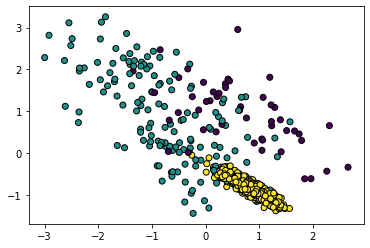

In [28]:
fig = plt.Figure(figsize=(12,6))
plt.scatter(data[:, 0], data[:, 1], c=label, linewidth=1, edgecolor='black')
plt.show()

SMOTE는 imblearn 라이브러리의 over_sampling 패키지에 있습니다.

#### 1) 모델 불러오기 및 정의하기

In [29]:
from imblearn.over_sampling import SMOTE
## k_neighbors 파라미터로 가까운 데이터 샘플의 수를 결정할 수 있습니다.
smote = SMOTE(k_neighbors=5)

#### 2, 3) 데이터에서 특징 찾기 (데이터 비율) +  데이터 샘플링

In [30]:
smoted_data, smoted_label = smote.fit_resample(data, label)

#### 4) 결과 살펴보기

In [31]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     53
1    154
2    793
dtype: int64

SMOTE 결과 
0    793
1    793
2    793
dtype: int64


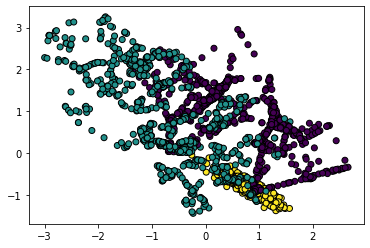

In [32]:
fig = plt.Figure(figsize=(12,6))
plt.scatter(smoted_data[:, 0], smoted_data[:, 1], c=smoted_label, linewidth=1, edgecolor='black')
plt.show()

이전의 2가지 샘플링 방법보다 데이터의 분포를 유지하면서 새로운 위치에 데이터를 생성할 수 있었습니다.

# Dimensionality Reduction
## 차원 축소는 왜 해야할까요? - 차원의 저주
차원의 저주는 저차원에서는 일어나지 않는 현상들이 고차원에서 데이터를 분석하거나 다룰 때 생겨나는 현상을 말합니다.<br>
고차원으로 올라갈 수록 공간의 크기가 증가하게 되는데, 데이터는 해당 공간에 한정적으로 위치되어 빈 공간이 많아지기 때문에 발생합니다.<br>
이러한 이유로 데이터의 차원이 너무 큰 경우에는 필요없는 변수를 제거하고, 과적합을 방지하기위해 데이터의 차원을 축소합니다. <br>
또는, 사람이 인식할 수 있는 차원은 3차원이 최대이므로 데이터의 시각화를 위해 차원을 축소하기도 합니다.

![CurseofDimensionality](./img/Curse_of_Dimensionality.png)

## 주 성분 분석 (Principal Component Analysis, PCA)
대표적인 차원 축소 기법으로 주 성분 분석(이하, PCA)이라는 방법이 있습니다.<br>
PCA는 여러 차원으로 이루어진 데이터를 가장 잘 표현하는 축으로 Projection 해서 차원을 축소하는 방식을 사용합니다.<br>
데이터를 가장 잘 표현하는 축이란, 데이터의 분산을 잘 표현하는 축이라고 할 수 있습니다.<br>
기본적으로 주성분(Principal Component, PC)은 데이터 셋을 특이값 분해를 통해 추출된 고유 벡터입니다.<br>
각 고유 벡터들은 서로 직교성을 띄기 때문에 데이터를 주성분로 Projection 시켰을 때 서로 독립적으로 데이터를 잘 표현할 수 있습니다.<br>
PCA의 단점으로는 떨어뜨린 주성분이 어떤 컬럼인지를 설명할 수 없다는 점이 있습니다. 

#### 주 성분 분석의 단계
1. 각 컬럼들의 값의 범위를 평균과 표준편차를 사용해 정규화시켜 동일하게 만들어줍니다. (스케일링)
2. 데이터의 공분산을 계산합니다.
3. 공분산 행렬에 대해 특이값 분해를 하여 주성분(고유 벡터)과 고유 값을 얻어냅니다.
4. 주성분과 대응되는 고유 값은 주성분이 데이터의 분산을 표현하는 정도의 척도로 사용되므로, 고유 값의 크기와 비율을 보고 몇개의 주성분을 선택할 것인지 또는 원하는 차원의 개수만큼의 주성분을 선택합니다.
5. 선택한 주성분으로 모든 데이터를 Projection시켜 데이터의 차원을 축소합니다.

#### Projection(사영)
Projection에 대해 간단히 짚고 넘어가겠습니다. <br>
벡터 공간에서 어떤 벡터 a와 b가 있을 때 벡터 b를 벡터 a에 사영한 결과(x)는 아래 그림과 같습니다.<br>
벡터 b를 벡터 a에 사영한다는 것은 벡터 a에 대해 수직인 방향으로 벡터 b를 떨어뜨리는 것을 의미합니다.<br>
간단히 말해서, 벡터 b의 그림자를 벡터 a에 떨어뜨린 것을 생각하시면 편합니다.

![Projection](./img/Projection.png)

PCA의 기본 원리는 데이터의 분산을 가장 잘 표현하는 벡터(축)를 찾아 해당 벡터에 데이터들을 사영 시키는 것입니다.

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()

이번에는 sklearn의 내장 데이터인, 64차원(8\*8) digit(숫자 이미지)데이터를 pca를 통해 2차원으로 떨어뜨려 시각화를 통해 살펴보겠습니다.

In [34]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [35]:
data = digits.data
label = digits.target

In [36]:
data.shape

(1797, 64)

숫자 이미지가 64 차원 벡터로 표현되어 있으므로 이미지를 확인하기 위해서는 (8,8) 행렬로 변환해주어야 합니다.

Label : 0


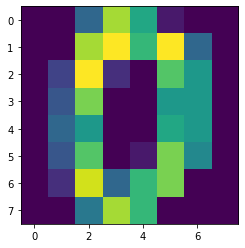

In [37]:
plt.imshow(data[0].reshape((8,8)))
print('Label : {}'.format(label[0]))

0번째 데이터는 이미지 상으로 0으로 보이고, 라벨도 0인 것을 확인하였습니다.<br>
pca를 통해 64차원 데이터를 2차원 데이터로 차원을 축소 시키겠습니다.<br>

* 여기에서 digits 데이터의 각 픽셀(변수)의 스케일은 0 ~ 16으로 같으므로 추가적인 정규화를 하지 않습니다.

#### 1) 모델 불러오기 및 정의하기

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
'''
n_componets: 몇 차원으로 줄일거야? 여기서는 2차원으로 줄임
정수일 때: 줄일 차원의 수
실수일 때: 퍼센트 만큼을 뽑는다.(예: 0.8이면 80%만큼의 주성분 개수를 뽑는다) 
시각화가 필요할 땐 주로 정수
시각화없이 그냥 차원축소만 원하면 보통 실수 사용
'''

#### 2) 데이터에서 특징 찾기 (주 성분 찾기)

In [39]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### 3) 데이터 변환 (주 성분으로 데이터 사영하기)

In [40]:
new_data = pca.transform(data)

#### 4) 결과 살펴보기

In [41]:
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('\nPCA를 거친 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)

PCA를 거친 데이터의 차원 
(1797, 2)


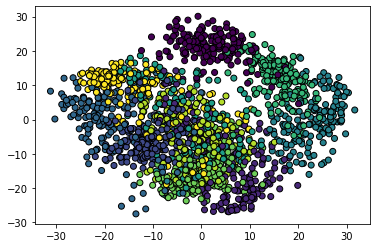

In [42]:
plt.scatter(new_data[:,0], new_data[:, 1], c=label, linewidth=1, edgecolor='black')
plt.show()

# Categorical Variable to Numeric Variable 
이번에는 범주형 변수를 수치형 변수로 나타내는 방법에 대해 알아보겠습니다. <br>
여기에서 범주형 변수란, 차의 등급을 나타내는 [소형, 중형, 대형] 처럼 표현되는 변수를 말합니다. <br>
범주형 변수는 주로 데이터 상에서 문자열로 표현되는 경우가 많으며, 문자와 숫자가 매핑되는 형태로 표현되기도 합니다.<br>

## 1. Label Encoding
라벨 인코딩은 n개의 범주형 데이터를 0~n-1 의 연속적인 수치 데이터로 표현합니다.<br>
예를 들어, 차의 등급 변수를 라벨 인코딩으로 변환하면 다음과 같이 표현할 수 있습니다.<br>
소형 : 0 <br>
중형 : 1 <br>
대형 : 2 <br>
라벨 인코딩은 간단한 방법이지만, '소형'과 '중형'이라는 범주형 데이터가 가지고 있는 차이가 0과 1의 수치적인 차이라는 의미가 아님을 주의하셔야 합니다. 

Label Encoding과 Sklearn의 preprocessing 패키지에 있습니다.<br>
이번에는 전복 데이터의 target이었던, 성별  변수를 수치형 변수로 변환하겠습니다.

In [43]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
label = data['Sex']
del data

In [44]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

#### 1) 모델 불러오기 및 정의하기

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### 2) 데이터에서 특징 찾기 (범주의 수)

In [46]:
le.fit(label)

LabelEncoder()

#### 3) 데이터 변환 (범주형 변수를 수치형 변수로)

In [47]:
label_encoded_label = le.transform(label)

#### 4) 결과 살펴보기

In [48]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), label_encoded_label.reshape((-1, 1))], axis=1), 
                      columns=['label', 'label_encoded'])
result.head(10)

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
5,I,1
6,F,0
7,F,0
8,M,2
9,F,0


In [49]:
le.inverse_transform(label_encoded_label)
'''
label 인코딩한걸 다시 범주형으로 바꿀 수 있음
'''

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

## 2. One-hot Encoding
원핫 인코딩은 n개의 범주형 데이터를 n개의 비트(0,1) 벡터로 표현합니다. <br>
예를 들어, 위에서 언급한 소형, 중형, 대형으로 이루어진 범주형 변수를 원핫 인코딩을 통해 변환하면 다음과 같이 표현할 수 있습니다.<br>
소형 : [1, 0, 0] <br>
중형 : [0, 1, 0] <br>
대형 : [0, 0, 1] <br>
원핫 인코딩으로 범주형 데이터를 나타내게되면, 서로 다른 범주에 대해서는 벡터 내적을 취했을 때 내적 값이 0이 나오게 됩니다. <br> 
이는 서로 다른 범주 데이터는 독립적인 관계라는 것을 표현할 수 있게 됩니다.

One-hot Encoding은 Sklearn의 preprocessing 패키지에 있습니다.


#### 1) 모델 불러오기 및 정의하기

In [50]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

#### 2) 데이터에서 특징 찾기 (범주의 수)

In [51]:
ohe.fit(label.values.reshape((-1, 1)))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [54]:
label.values.shape

'''
벡터형태로 되어있음 (4117, 1)이 matrix형태 (4117, )은 벡터형태
'''

(4177,)

#### 3) 데이터 변환 (범주형 변수를 수치형 변수로)

In [52]:
one_hot_encoded = ohe.transform(label.values.reshape((-1,1)))
'''
values는 판다스에서 넘파이로 뽑을 수 있음 이때 (4117, ) 이렇게 벡터로 되어있음
reshape으로 다시...차원은(-1, 1): 내가 지금 n차원으로 만들건데 맨마지막차원 하나는 1로 만들고 나머지는
너가 알아서해 -> (4117, ) 같은 경우 (4117, 1)로 변경됨
'''

#### 4) 결과 살펴보기

In [53]:
columns = np.concatenate([np.array(['label']) , ohe.categories_[0]])
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), one_hot_encoded.reshape((-1, 3))], axis=1), 
                      columns=columns)
result.head(10)

,label,F,I,M
0,M,0,0,1
1,M,0,0,1
2,F,1,0,0
3,M,0,0,1
4,I,0,1,0
5,I,0,1,0
6,F,1,0,0
7,F,1,0,0
8,M,0,0,1
9,F,1,0,0


### Reference
- UCI repository, Abalone DataSet : https://archive.ics.uci.edu/ml/datasets/Abalone 
- Wikipedia, z-score : https://ko.wikipedia.org/wiki/표준_점수 
- Sklearn, Digits datast : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html&sa=U&ved=0ahUKEwj334uTxODhAhWFgrwKHQBgDd4QFggQMAY&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw3dwyCabB7mxD5cEn2odXbC
- Sklearn, Min-Max Scaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 
- Sklearn, Standard Scaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 
- Imblearn, Random OverSampling : https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler 
- Imblearn, Random UnderSampling : https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler 
- Imblearn, SMOTE : https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html?highlight=smote
- Imblearn, Sampling Examples : https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html?highlight=smote 
- Curse of Dimension - https://wikidocs.net/7646
- Wikipedia, PCA - https://ko.wikipedia.org/wiki/주성분_분석 